 ## Omega aragonite Expriments (Terminos lagoon)

In [1]:
# Import packages
import pandas as pd
import PyCO2SYS as pyco2
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

- Read Terminos lagoon csv data file 



In [2]:
# Function to read in csv file
def read_csv(file):
    """
    Read in csv file and return pandas dataframe
    """
    df = pd.read_csv(file, sep=",", header=0,  decimal=".", encoding='utf-8')
    return df

In [3]:
# define file path 
terminos_ta_dic_data_path = "../data/terminoslagoon_TA_DIC_2024_RawData.csv"

# Read in data
terminos_ta_dic_data = read_csv(terminos_ta_dic_data_path)

# Copy data to new dataframe
terminos_ta_dic = terminos_ta_dic_data.copy()

### Calculate TA vs DIC linear relationship in the Terminos lagoon

In [4]:
import numpy as np

def calculate_linear_relationship(x, y):
    # Fit a linear model to the data (x, y)
    coefficients = np.polyfit(x, y, 1)  # Linear fit (polynomial of degree 1)
    slope, intercept = coefficients  # Unpacking the coefficients

    # Function to calculate y based on x using the found linear relationship
    def linear_model(x_new):
        return slope * x_new + intercept

    return linear_model

In [5]:
# Create the TA and DIC data from the linear relationship

x = terminos_ta_dic["TA_micromol_kg"]
y = terminos_ta_dic["DIC_micromol_kg"]

# Create the function using the existing data
linear_function = calculate_linear_relationship(x, y)

# Example data

TA_linear= np.arange(2000, 4000, 0.5)

DIC_linear= linear_function(TA_linear)


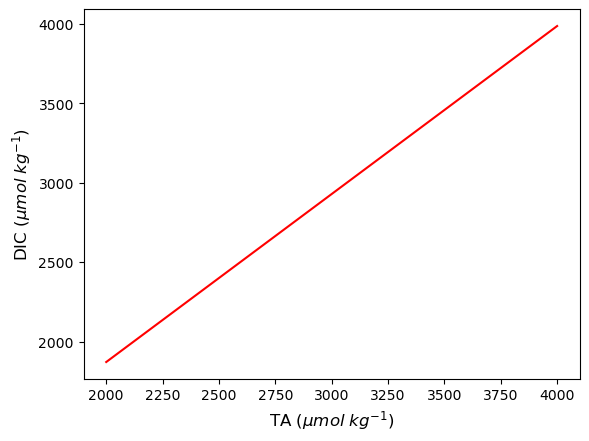

In [6]:
plt.plot(TA_linear, DIC_linear, label="Linear regression model", color="red")
# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.show()


### PyCO2SYS configuration from  TA and DIC linear, using salintiny = 35

In [7]:
# Create dictionary with data configuration for PyCO2SYS. 
linear_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_linear,
    # TA measured in the lab, Total scale
    "par2": TA_linear,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": 35,  # in-situ salinity in PSU, constant for all samples
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

#### Run PyCO2SYS

In [8]:
# Run PyCO2SYS to calculate the carbonate system parameters
linear_inorganic_carbon_results= pyco2.sys(**linear_co2sys_params_dic_ta_config)


### Plot linear results, constant salinity = 35

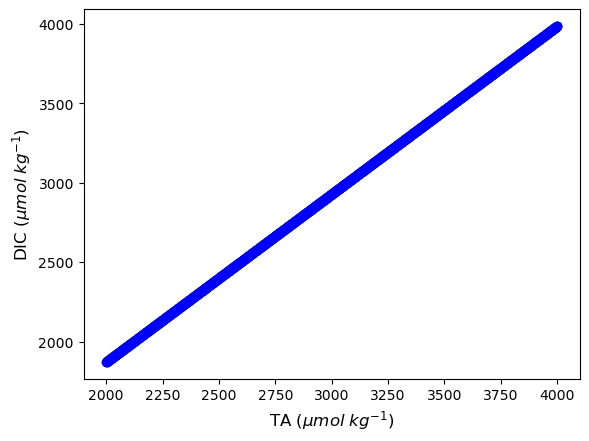

In [9]:
# Check the results of the PyCO2SYS
# Plot linear relationship Ta vs DIC, constant temperature and salinity
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(linear_inorganic_carbon_results["alkalinity"], linear_inorganic_carbon_results["dic"], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)


plt.show()


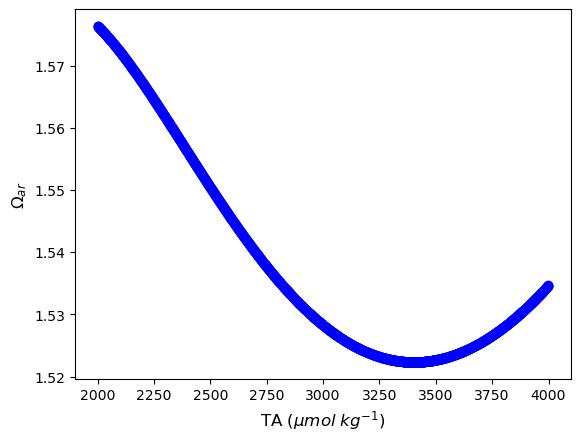

In [10]:
# Plot TA vs saturation_aragonite, constant temperature and salinity
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(linear_inorganic_carbon_results["alkalinity"], linear_inorganic_carbon_results["saturation_aragonite"], color='blue', alpha=0.5)
# Add labels and title

plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('$\Omega _{ar}$', fontsize = 12)


plt.show()


- **Based on the assumption of a constant salinity of 35, the relationship between TA and Omega_ar appears accurate.**

## Random salinity experiment

In [11]:
# Create random salinity data for 4000 samples
salinity_random = np.random.uniform(0, 35, 4000)


In [12]:
# Create dictionary with data configuration for PyCO2SYS. 
random_co2sys_params_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_linear,
    # TA measured in the lab, Total scale
    "par2": TA_linear,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": salinity_random,  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

In [13]:
# Run PyCO2SYS to calculate the carbonate system parameters, using random salinity data and the linear relationship between TA and DIC, the temperature is constant
random_results= pyco2.sys(**random_co2sys_params_config)


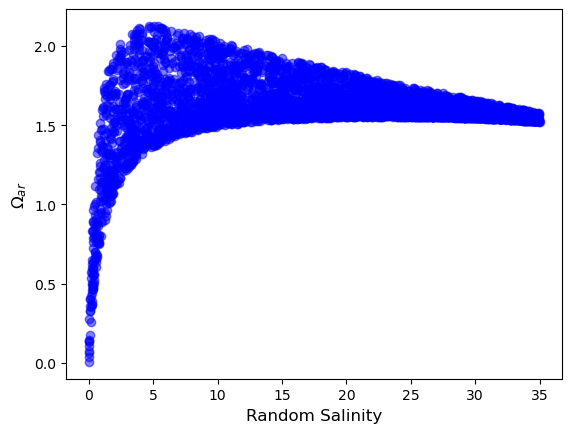

In [14]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["salinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)


plt.xlabel('Random Salinity', fontsize = 12)

plt.ylabel('$\Omega _{ar}$', fontsize = 12)


plt.show()


- Our research has revealed a clear and consistent linear relationship between omega and salinity, which becomes complete after 5 salinity.

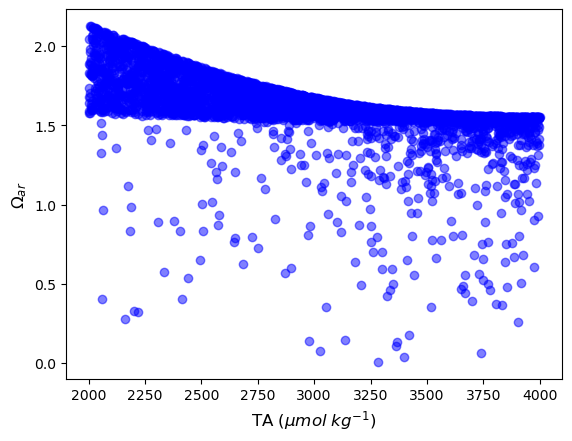

In [15]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["alkalinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)


plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('$\Omega _{ar}$', fontsize = 12)


plt.show()

- Anomalus Omega_ar values are observed 

### **In waters with low salinities (< 10), the theoretical relationship between calcium concentration and salinity can produce low omega values, which can produce incorrect values, especially in karstic estuaries where calcium concentration may not depend on salinity.**
